<a href="https://colab.research.google.com/github/sivah0726/Pizza-Sales-Analysis/blob/main/Pizza_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/pizza_sales.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [ ]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [ ]:
print("The No of Columns in the dataset :",df.shape[1])

The No of Columns in the dataset : 12


In [ ]:
print("The No of Rows in the dataset :",df.shape[0])

The No of Rows in the dataset : 48620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
df.dtypes

,0
pizza_id,int64
order_id,int64
pizza_name_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
total_income = df['total_price'].sum()
total_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = total_income / total_orders
avg_per_order = total_sold / total_orders

print(f"total income : ${total_income:,.2f} ")
print(f"Total Pizzas Sold: {total_sold:,}")
print(f"Total orders : {total_orders :,}")
print(f"Avgerage Order Value : ${avg_order_value :,.2f}")
print(f"Avgerage Pizza Per Order : {avg_per_order :,.2f}")


total income : $817,860.05 
Total Pizzas Sold: 49,574
Total orders : 21,350
Avgerage Order Value : $38.31
Avgerage Pizza Per Order : 2.32


In [ ]:
ingredient = (
              df['pizza_ingredients']
              .str.split(',')
              .explode()
              .str.strip()
              .value_counts()
              .reset_index()
              .rename(columns={'index':'Count','pizza_ingredients':'Indegredients'})
)
print(ingredient.head(10))

       Indegredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


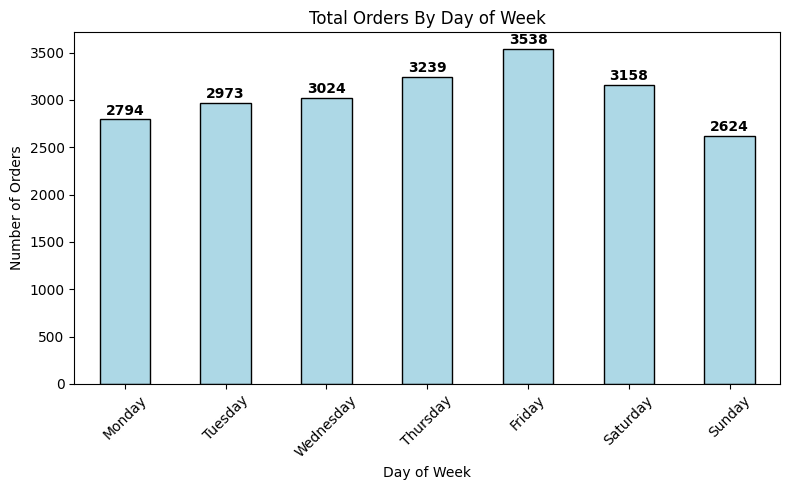

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

df['day_name'] = pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)

orders_by_day = df.groupby('day_name',observed=False)['order_id'].nunique()

ax = orders_by_day.plot(kind='bar',figsize=(8,5),color='lightblue',edgecolor='black')

plt.title("Total Orders By Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
  plt.text(i,val + 20 ,str(val), ha = 'center', va = 'bottom', fontsize= 10,fontweight='bold')

plt.tight_layout()
plt.show()

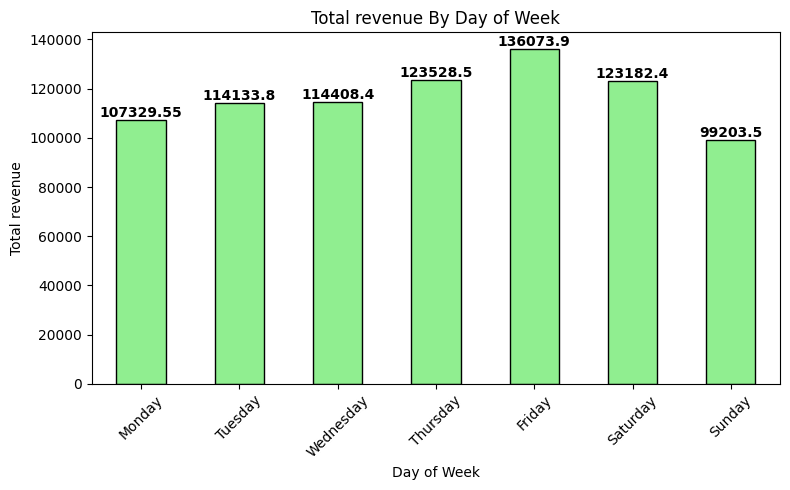

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

df['day_name'] = pd.Categorical(df['day_name'],categories=weekday_order,ordered=True)
orders_by_day = df.groupby('day_name',observed=False)['total_price'].sum()
ax = orders_by_day.plot(kind='bar',figsize=(8,5),color='lightgreen',edgecolor='black')

plt.title("Total revenue By Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total revenue")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
  plt.text(i,val + 20 ,str(val), ha = 'center', va = 'bottom', fontsize= 10,fontweight='bold')

plt.tight_layout()
plt.show()

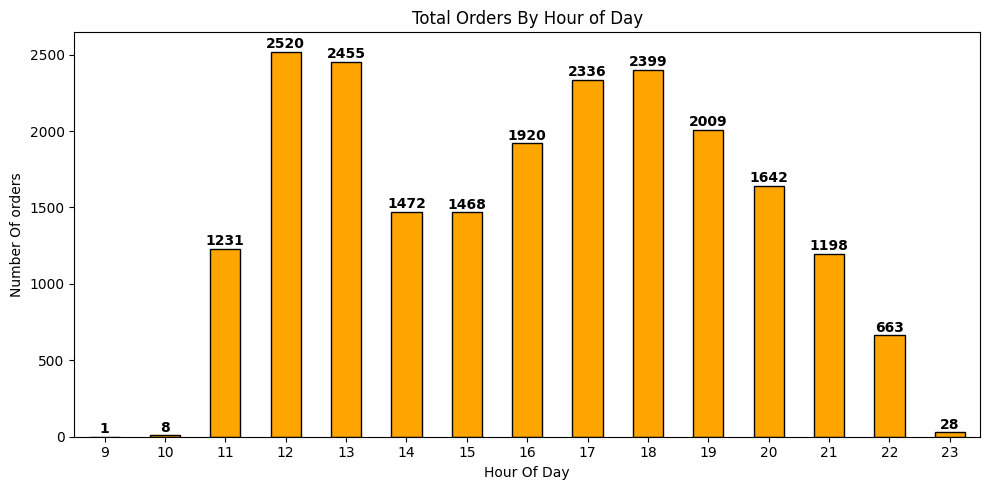

In [ ]:
df['order_time'] = pd.to_datetime(df['order_time'],format='%H:%M:%S')
df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour',observed=False)['order_id'].nunique()

ax = orders_by_hour.plot(kind='bar',figsize=(10,5), color='orange',edgecolor='black')

plt.title("Total Orders By Hour of Day")
plt.xlabel("Hour Of Day")
plt.ylabel("Number Of orders")
plt.xticks(rotation=0)

for i ,val in enumerate(orders_by_hour):
  plt.text(i,val + 5 ,str(val), ha ='center',va = 'bottom',fontsize=10,fontweight='bold')

plt.tight_layout()
plt.show()

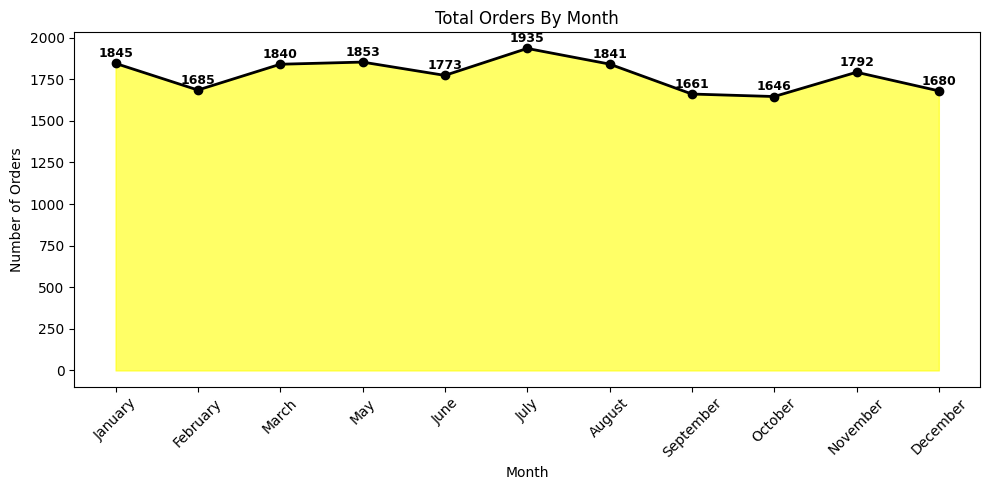

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ["January","February","March","May","June","July","August","September","October","November","December"]

df['month_name'] = pd.Categorical(df['month_name'],categories=month_order, ordered=True)
orders_by_month = df.groupby('month_name',observed=False)['order_id'].nunique()

plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index,orders_by_month.values,color="yellow",alpha=0.6)
plt.plot(orders_by_month.index,orders_by_month.values,color="Black",linewidth=2,marker='o')

plt.title("Total Orders By Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_month):
  plt.text(i,val + 20 ,str(val), ha = 'center',va = 'bottom', fontsize= 9,fontweight='bold')

plt.tight_layout()
plt.show()

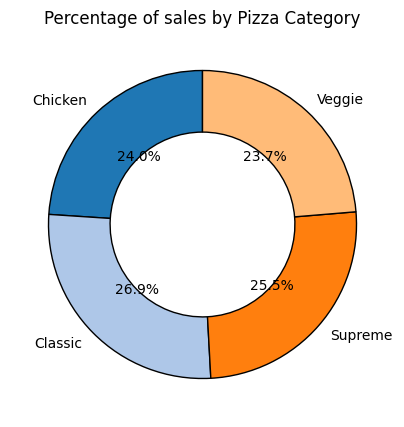

In [ ]:
category_sales = df.groupby('pizza_category')['total_price'].sum()

category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(5,5))
colors = plt.get_cmap('tab20').colors

plt.pie(category_pct,labels=category_pct.index,autopct='%1.1f%%',startangle=90, colors = colors, wedgeprops = {'edgecolor':'black','width':0.4})
plt.title("Percentage of sales by Pizza Category")
plt.show()

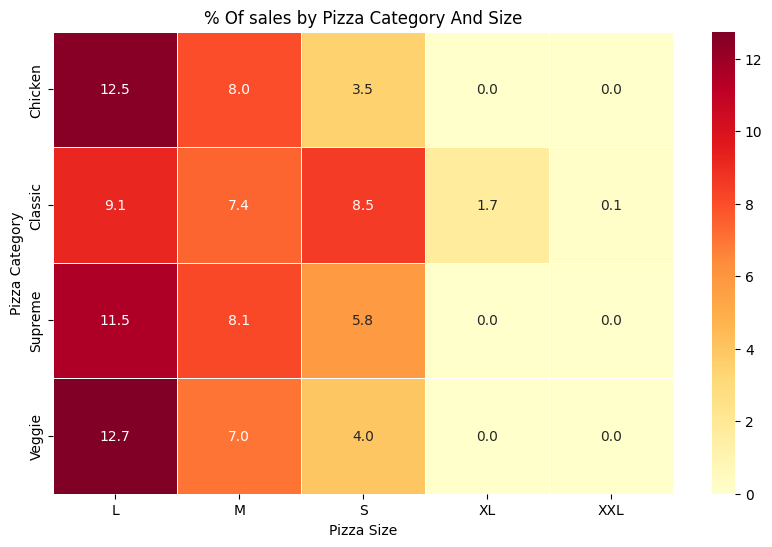

In [ ]:
sales_pivot = df.pivot_table(
    index = 'pizza_category',
    columns= 'pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct,annot=True,fmt=".1f",cmap="YlOrRd",linewidths=0.5)
plt.title("% Of sales by Pizza Category And Size")
plt.ylabel("Pizza Category")
plt.xlabel("Pizza Size")
plt.show()


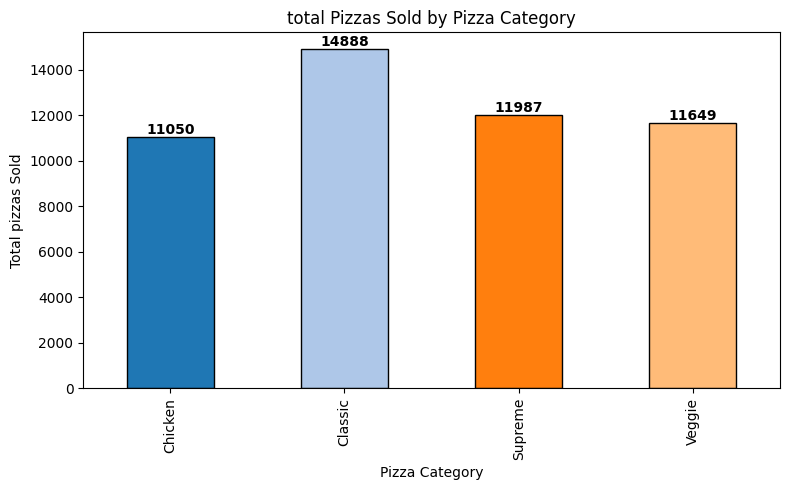

In [ ]:
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

colors = list(plt.get_cmap('tab20').colors)
colors = colors[:len(pizzas_by_category)]

ax = pizzas_by_category.plot(kind='bar',figsize=(8,5),color=colors,edgecolor='black')

plt.title("total Pizzas Sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total pizzas Sold")

for i ,val in enumerate(pizzas_by_category):
  plt.text(i , val + 5 , str(val), ha = 'center',va = 'bottom',fontsize = 10, fontweight ='bold')

plt.tight_layout()
plt.show()

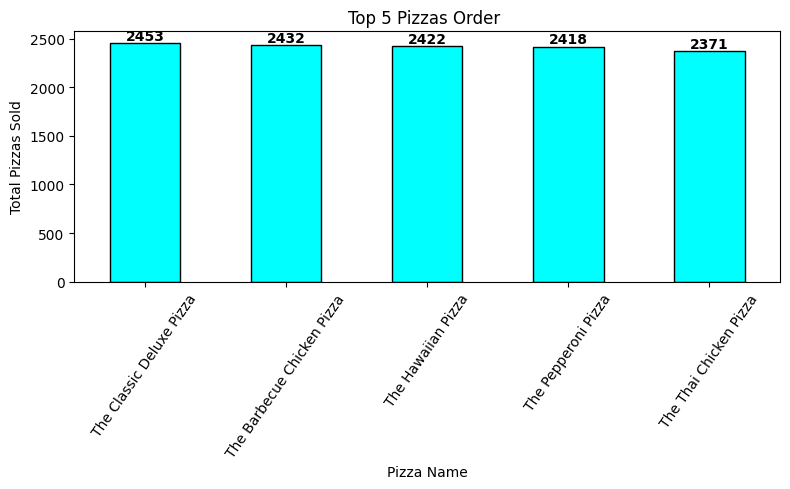

In [ ]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar',figsize=(8,5),color='Aqua',edgecolor='black')

plt.title("Top 5 Pizzas Order ")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=55)

for i , val in enumerate(top5):
  plt.text(i, val + 2 ,str(val), ha = 'center', va = 'bottom',fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

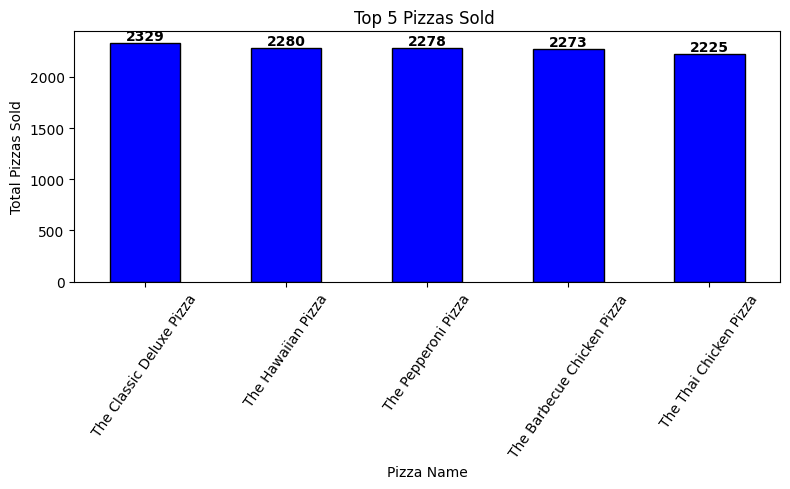

In [ ]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar',figsize=(8,5),color='blue',edgecolor='black')

plt.title("Top 5 Pizzas Sold ")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=55)

for i , val in enumerate(top5):
  plt.text(i, val + 2 ,str(val), ha = 'center', va = 'bottom',fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

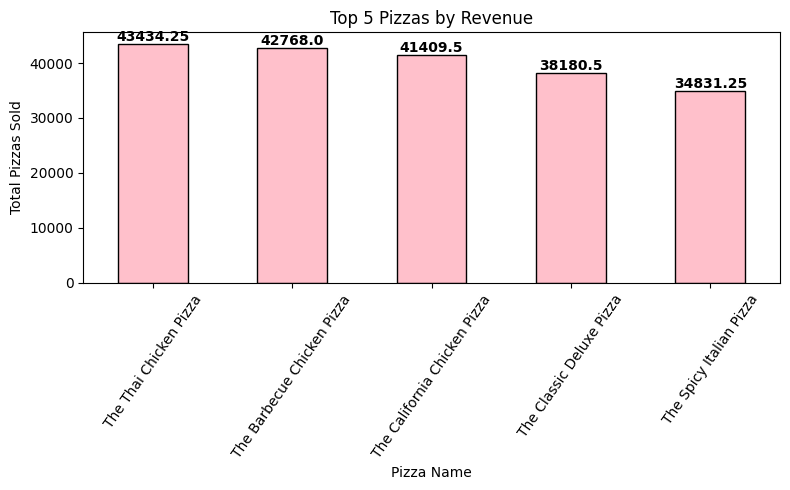

In [ ]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar',figsize=(8,5),color='pink',edgecolor='black')

plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=55)

for i , val in enumerate(top5):
  plt.text(i, val + 2 ,str(val), ha = 'center', va = 'bottom',fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

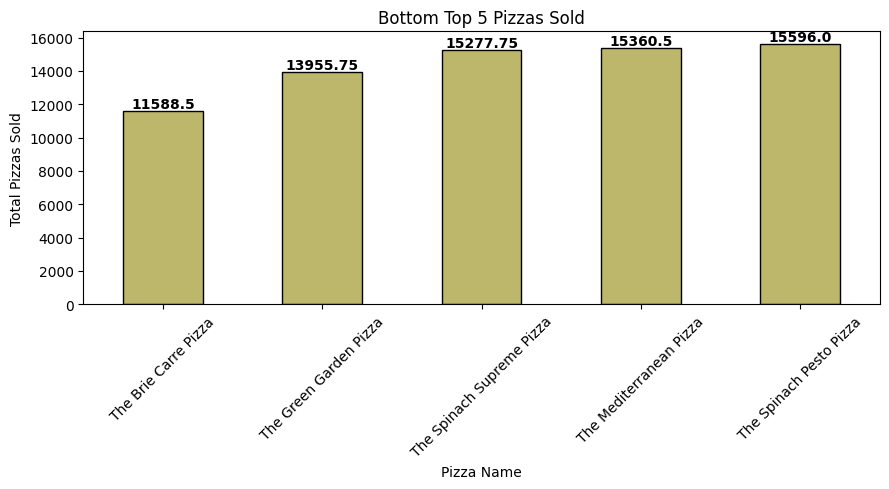

In [ ]:
Bottom_5_pizzas = pizzas_by_name.sort_values(ascending=True).head(5)

ax = Bottom_5_pizzas.plot(kind='bar',figsize=(9,5), color = 'DarkKhaki',edgecolor='black')

plt.title("Bottom Top 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i , val in enumerate(Bottom_5_pizzas):
  plt.text(i,val + 2 , str(val),ha = 'center',va='bottom',fontsize='10',fontweight='bold')

plt.tight_layout()
plt.show()